##### S1: Load the TF-IDF Vectors from CSV file

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Load the TF-IDF vectors from the CSV file
tfidf_vectors = pd.read_csv('tfidf_vectorized_300.csv', index_col=0)

# Convert the DataFrame to a numpy array
X = tfidf_vectors.values

print(f"TF-IDF matrix shape: {X.shape}")

TF-IDF matrix shape: (300, 4999)


##### S2: Apply K-Means Clustering

In [2]:
# Number of clusters
num_clusters = 6

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Get cluster labels
labels = kmeans.labels_

# Print cluster assignment for each story
for i, label in enumerate(labels):
    print(f"Story {i+1} is in cluster {label}")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Story 1 is in cluster 2
Story 2 is in cluster 4
Story 3 is in cluster 4
Story 4 is in cluster 3
Story 5 is in cluster 5
Story 6 is in cluster 4
Story 7 is in cluster 4
Story 8 is in cluster 3
Story 9 is in cluster 1
Story 10 is in cluster 5
Story 11 is in cluster 1
Story 12 is in cluster 5
Story 13 is in cluster 3
Story 14 is in cluster 4
Story 15 is in cluster 5
Story 16 is in cluster 3
Story 17 is in cluster 5
Story 18 is in cluster 0
Story 19 is in cluster 4
Story 20 is in cluster 1
Story 21 is in cluster 1
Story 22 is in cluster 3
Story 23 is in cluster 5
Story 24 is in cluster 2
Story 25 is in cluster 1
Story 26 is in cluster 4
Story 27 is in cluster 5
Story 28 is in cluster 5
Story 29 is in cluster 3
Story 30 is in cluster 4
Story 31 is in cluster 5
Story 32 is in cluster 5
Story 33 is in cluster 4
Story 34 is in cluster 2
Story 35 is in cluster 3
Story 36 is in cluster 1
Story 37 is in cluster 5
Story 38 is in cluster 5
Story 39 is in cluster 1
Story 40 is in cluster 3
Story 41 

##### S3: Extract Top Terms for Each Cluster and Print 

In [3]:
# Function to get the top terms in each cluster
def get_top_terms_per_cluster(tfidf_matrix, labels, terms, num_terms=20):
    sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    top_terms = {f'Cluster {i}': [] for i in range(num_clusters)}
    for i in range(num_clusters):
        for j in sorted_centroids[i, :num_terms]:
            top_terms[f'Cluster {i}'].append(terms[j])
    return top_terms

# Extract the terms from the CSV column names
terms = tfidf_vectors.columns

# Get the top terms for each cluster
top_terms = get_top_terms_per_cluster(X, labels, terms)

# Create a DataFrame to display the top terms in table format
top_terms_df = pd.DataFrame(top_terms)

# Print the DataFrame
print()
print(top_terms_df)



      Cluster 0  Cluster 1   Cluster 2   Cluster 3   Cluster 4   Cluster 5
0         actor   abstract       india          ai     company          ai
1        writer    journal    mckinsey       india       apple       image
2         guild     street      report      altman      google         new
3        strike       wall       genai     startup      openai  technology
4     hollywood         pg     company      openai         new        tool
5        studio        dan      global     company   microsoft     chatgpt
6            ai  gallagher        data      nvidia  technology     company
7         union       york     revenue  technology        time         use
8      contract        new   cognizant       adobe        tech        time
9          film      april       sachs      indian        year      school
10  negotiation         ai     goldman         ceo    investor     student
11     director       june          ai       board        york       human
12       script   reserv

In [4]:
cluster_names = {

    0: "Technology Companies and Innovations",
    1: "Startups and Emerging Industries",
    2: "Venture Capital and Investment Funding",
    3: "Political Events and Elections",
    4: "AI. and Disinformation", 
    5: "Job Market and Employment"
}

top_terms_df = pd.DataFrame(top_terms)
# Rename the columns with descriptive cluster names
top_terms_df.columns = [cluster_names[int(col.split()[1])] for col in top_terms_df.columns]

# Print the DataFrame
print(top_terms_df)

   Technology Companies and Innovations Startups and Emerging Industries  \
0                                 actor                         abstract   
1                                writer                          journal   
2                                 guild                           street   
3                                strike                             wall   
4                             hollywood                               pg   
5                                studio                              dan   
6                                    ai                        gallagher   
7                                 union                             york   
8                              contract                              new   
9                                  film                            april   
10                          negotiation                               ai   
11                             director                             june   
12          

##### S4: Plot the Clusters

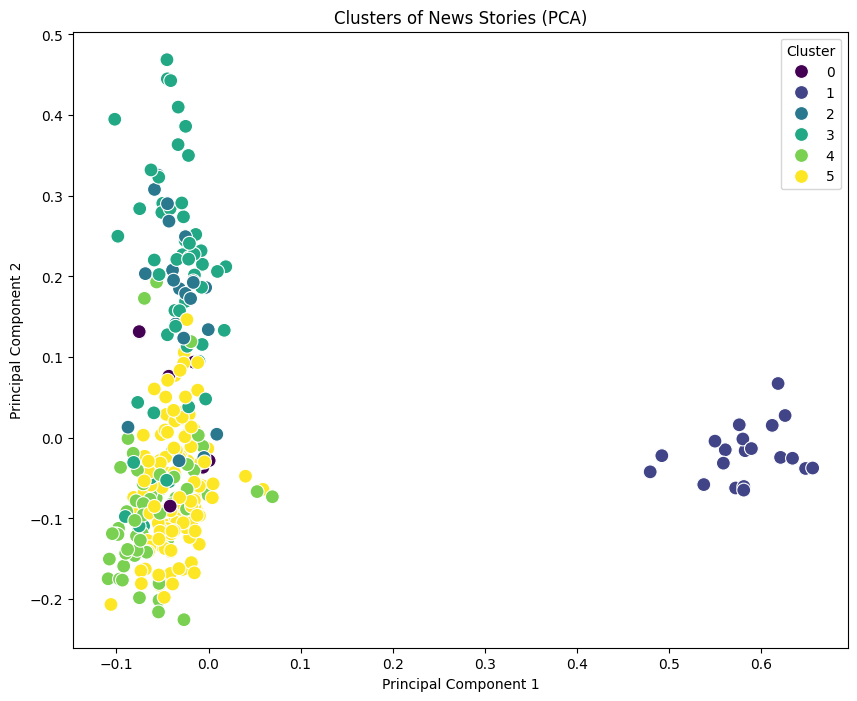

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Create a DataFrame with the PCA results and the cluster labels
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters of News Stories (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

##### Visualization Using UMAP

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-06-11 18:30:33.597562: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


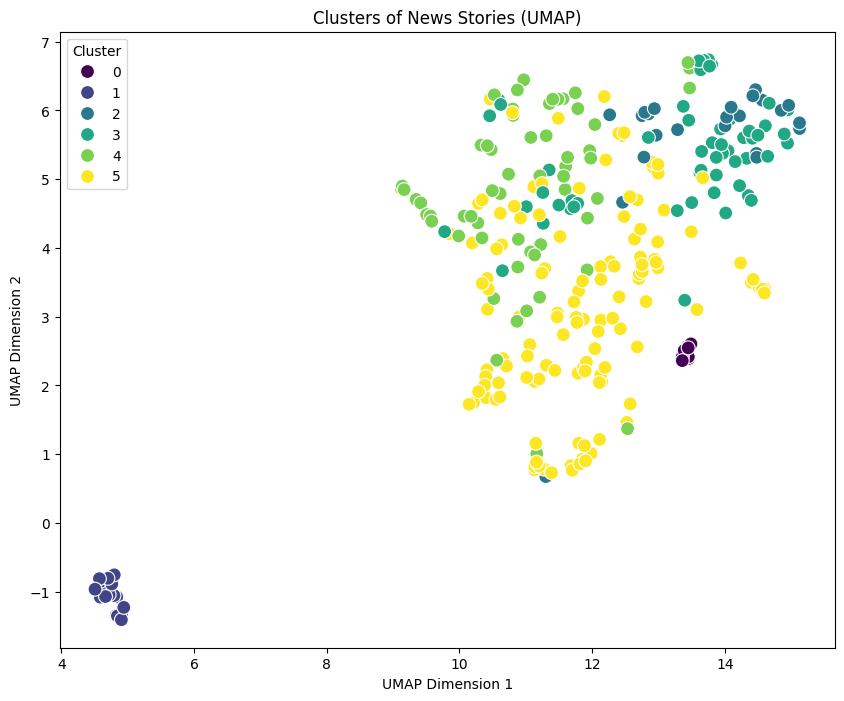

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import umap
import matplotlib.pyplot as plt
import seaborn as sns


# Apply UMAP to reduce dimensions to 2D
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X)

# Create a DataFrame with the UMAP results and the cluster labels
umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
umap_df['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters of News Stories (UMAP)')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Cluster')
plt.show()


##### Hierarchical Clustering and Dendrograms

TF-IDF matrix shape: (300, 4999)


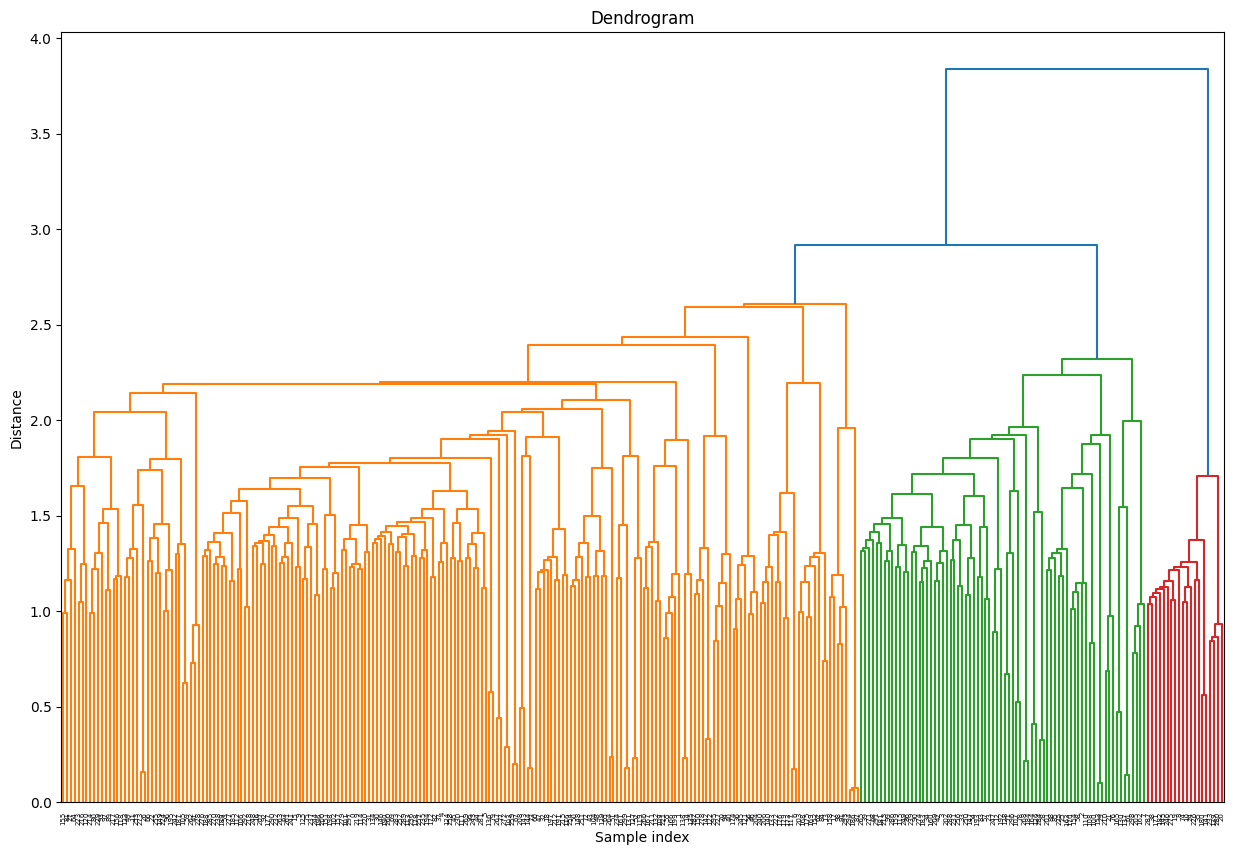

In [7]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the TF-IDF vectors from the CSV file
tfidf_vectors = pd.read_csv('tfidf_vectorized_300.csv', index_col=0)

# Convert the DataFrame to a numpy array
X = tfidf_vectors.values

print(f"TF-IDF matrix shape: {X.shape}")

# Apply hierarchical clustering
linked = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()
